In [ ]:
# files  - https://drive.google.com/drive/folders/1bynkOIXCurhJ9_Y5Q14KWX5yDyCRkKfN

# Segmentation of Indian Traffic

In [ ]:
import math
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd
import os
from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
from tqdm import tqdm

In [ ]:
!wget --header="Host: doc-08-14-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.61 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8,hi;q=0.7" --header="Cookie: AUTH_9nr37g9g3epp3lt0qqj5f23bvh13jpl9_nonce=kgt1b9n2ojq14" --header="Connection: keep-alive" "https://doc-08-14-docs.googleusercontent.com/docs/securesc/2eosgq9ti07sngsmmpqg364f418rgmh3/ut07kp9fm4a5ffno5q5pmnriko8bl5dp/1653996225000/00484516897554883881/04329477714974734877/1iQ93IWVdR6dZ6W7RahbLq166u-6ADelJ?e=download&ax=ACxEAsaOimDZlUfdzilzR1X-wW6zoKMiAfSUSaCxoBpJnFq9EI5-ad3o4_p6n5d7rV8p69bIyrjsiNv38fe3vZ3D1z0Qao2Xz3s3SyS3pyx_MK3QyA6FXCaKsgICyA6uPopEEexNav--vLRTjIocQADy3FebfsO7pZ3u4tPNNtM6vpLpt4HJ5dKE-qVJPBl1sqOM5W_lfNud4vDfkvxwEh1kUYz0xpZdfDbKXgLs6f-Fs9842MsolpCobuYcE5fN9LOsXe5PSTBXK1QfxY40Xkt2OXk9zfxoulWsdj4Fr1f6m08c58SDQZHDGDTGD_2BE2xXJJpdpbTZjKNuzedi2MlhvP3nv9YyoeGcNrvMTnwnKGBraS87OsTQt-SY_Vi0FXPBjMHzUsPkqGNYmbxWw1SyXOIxymmQzVNZClFKWDSb6Mqra7nbGfkAYMxL1f2cOicPRL19qRCelKKKF6dezzHW2TSoG9hc8SPZKupkqPNPZzqxUGsE6dVzsKeZcDTA5dGm_g-eyTkGqftbKWFKo07m5N5acrt_nqFkTtK7DC_cUbuOAyLPErB2AVx0DEZIRSIrfxPi6zQDrunkbGd5m-x0dMIMvOha8csMnUS6VrsHfHXDdGAeDrZn3YGaK8nVKFeWDt9j6IHzFG_lI50141eQyo4Z5kRcJY8jbYY2NQvO_nRokghkikC-fWvITUfkaA_xeO5S6w7w5QN7BZoCVDIo2Kx9vjc8grV6B0jNSg0XY17AL619KA&authuser=0&nonce=kgt1b9n2ojq14&user=04329477714974734877&hash=qviu1dg6ncfg36bvj05kcopc27jgbp4n" -c -O 'data.zip'

--2022-05-31 11:24:27--  https://doc-08-14-docs.googleusercontent.com/docs/securesc/2eosgq9ti07sngsmmpqg364f418rgmh3/ut07kp9fm4a5ffno5q5pmnriko8bl5dp/1653996225000/00484516897554883881/04329477714974734877/1iQ93IWVdR6dZ6W7RahbLq166u-6ADelJ?e=download&ax=ACxEAsaOimDZlUfdzilzR1X-wW6zoKMiAfSUSaCxoBpJnFq9EI5-ad3o4_p6n5d7rV8p69bIyrjsiNv38fe3vZ3D1z0Qao2Xz3s3SyS3pyx_MK3QyA6FXCaKsgICyA6uPopEEexNav--vLRTjIocQADy3FebfsO7pZ3u4tPNNtM6vpLpt4HJ5dKE-qVJPBl1sqOM5W_lfNud4vDfkvxwEh1kUYz0xpZdfDbKXgLs6f-Fs9842MsolpCobuYcE5fN9LOsXe5PSTBXK1QfxY40Xkt2OXk9zfxoulWsdj4Fr1f6m08c58SDQZHDGDTGD_2BE2xXJJpdpbTZjKNuzedi2MlhvP3nv9YyoeGcNrvMTnwnKGBraS87OsTQt-SY_Vi0FXPBjMHzUsPkqGNYmbxWw1SyXOIxymmQzVNZClFKWDSb6Mqra7nbGfkAYMxL1f2cOicPRL19qRCelKKKF6dezzHW2TSoG9hc8SPZKupkqPNPZzqxUGsE6dVzsKeZcDTA5dGm_g-eyTkGqftbKWFKo07m5N5acrt_nqFkTtK7DC_cUbuOAyLPErB2AVx0DEZIRSIrfxPi6zQDrunkbGd5m-x0dMIMvOha8csMnUS6VrsHfHXDdGAeDrZn3YGaK8nVKFeWDt9j6IHzFG_lI50141eQyo4Z5kRcJY8jbYY2NQvO_nRokghkikC-fWvITUfkaA_xeO5S6w7w5QN7BZoCVDIo2Kx9vjc8grV6B0jNSg

In [ ]:
!unzip /content/data.zip

<pre>
1. You can download the data from this link, and extract it

2. All your data will be in the folder "data" 

3. Inside the data you will be having two folders

|--- data
|-----| ---- images
|-----| ------|----- Scene 1
|-----| ------|--------| ----- Frame 1 (image 1)
|-----| ------|--------| ----- Frame 2 (image 2)
|-----| ------|--------| ----- ...
|-----| ------|----- Scene 2
|-----| ------|--------| ----- Frame 1 (image 1)
|-----| ------|--------| ----- Frame 2 (image 2)
|-----| ------|--------| ----- ...
|-----| ------|----- .....
|-----| ---- masks
|-----| ------|----- Scene 1
|-----| ------|--------| ----- json 1 (labeled objects in image 1)
|-----| ------|--------| ----- json 2 (labeled objects in image 1)
|-----| ------|--------| ----- ...
|-----| ------|----- Scene 2
|-----| ------|--------| ----- json 1 (labeled objects in image 1)
|-----| ------|--------| ----- json 2 (labeled objects in image 1)
|-----| ------|--------| ----- ...
|-----| ------|----- .....
</pre>

In [ ]:
f =open('/content/data/mask/201/frame0029_gtFine_polygons.json')
print(type(f))
data = json.load(f)

data

# Task 1: Preprocessing

## 1. Get all the file name and corresponding json files

In [ ]:
# https://thispointer.com/python-how-to-get-list-of-files-in-directory-and-sub-directories/

def getListOfFiles(dirName):
      listOfFiles = list()                          # listOfFiles will contain all file names  in dirName directory 
      for (dirpath, dirnames, filenames) in os.walk(dirName):                     # understand os.walk() - https://www.geeksforgeeks.org/os-walk-python/
          listOfFiles += [os.path.join(dirpath[2:], file) for file in filenames]   
      return sorted(listOfFiles)


def return_file_names_df(root_dir):
    # write the code that will create a dataframe with two columns ['images', 'json']
    # the column 'image' will have path to images
    # the column 'json' will have path to json files

 
    images_dir = os.path.join(root_dir , 'images')
    masks_dir = os.path.join(root_dir , 'mask')

    imageFiles =  getListOfFiles(images_dir)
    maskFiles =  getListOfFiles(masks_dir)

    # print(imageFiles)
    data_df = pd.DataFrame({'images' : imageFiles , 'json' : maskFiles})

    return data_df

In [ ]:
data_df = return_file_names_df('./data')
data_df.head()

,images,json
0,data/images/201/frame0029_leftImg8bit.jpg,data/mask/201/frame0029_gtFine_polygons.json
1,data/images/201/frame0299_leftImg8bit.jpg,data/mask/201/frame0299_gtFine_polygons.json
2,data/images/201/frame0779_leftImg8bit.jpg,data/mask/201/frame0779_gtFine_polygons.json
3,data/images/201/frame1019_leftImg8bit.jpg,data/mask/201/frame1019_gtFine_polygons.json
4,data/images/201/frame1469_leftImg8bit.jpg,data/mask/201/frame1469_gtFine_polygons.json


> If you observe the dataframe, we can consider each row as single data point, where first feature is image and the second feature is corresponding json file

In [ ]:

def grader_1(data_df):
    for i in data_df.values:
        if not (path.isfile(i[0]) and path.isfile(i[1]) and i[0][12:i[0].find('_')]==i[1][10:i[1].find('_')]):
            return False
    return True

In [ ]:
grader_1(data_df)

True

In [ ]:
data_df.shape

(4008, 2)

## 2. Structure of sample Json file

<img src='https://i.imgur.com/EfR5KmI.png' width="200" height="100">

* Each File will have 3 attributes
    * imgHeight: which tells the height of the image
    * imgWidth: which tells the width of the image
    * objects: it is a list of objects, each object will have multiple attributes,
        * label: the type of the object
        * polygon: a list of two element lists, representing the coordinates of the polygon

#### Compute the unique labels

Let's see how many unique objects are there in the json file.
to see how to get the object from the json file please check <a href='https://www.geeksforgeeks.org/read-json-file-using-python/'>this blog </a>

In [ ]:
def return_unique_labels(data_df):
    # for each file in the column json
    #       read and store all the objects present in that file
    # compute the unique objects and retrun them
    # if open any json file using any editor you will get better sense of it
    unique_labels = set()

    for jsonFile in data_df['json']:
      f =open(jsonFile)
      data = json.load(f)
      objects_list = data['objects']                #list of dictionaries 

      for object in objects_list : 
        label = object['label']
        unique_labels.add(label)


    return unique_labels

In [ ]:
unique_labels = return_unique_labels(data_df)

In [ ]:
len(unique_labels)

40

In [ ]:
print(unique_labels)

{'unlabeled', 'curb', 'traffic sign', 'obs-str-bar-fallback', 'bus', 'polegroup', 'parking', 'ego vehicle', 'trailer', 'traffic light', 'billboard', 'rider', 'person', 'building', 'non-drivable fallback', 'sidewalk', 'guard rail', 'rectification border', 'bridge', 'animal', 'ground', 'caravan', 'car', 'sky', 'autorickshaw', 'truck', 'wall', 'train', 'vehicle fallback', 'rail track', 'vegetation', 'fallback background', 'out of roi', 'motorcycle', 'tunnel', 'fence', 'bicycle', 'pole', 'road', 'drivable fallback'}


<img src='https://i.imgur.com/L4QH6Tp.png'>

In [ ]:
label_clr = {'road':10, 'parking':20, 'drivable fallback':20,'sidewalk':30,'non-drivable fallback':40,'rail track':40,\
                        'person':50, 'animal':50, 'rider':60, 'motorcycle':70, 'bicycle':70, 'autorickshaw':80,\
                        'car':80, 'truck':90, 'bus':90, 'vehicle fallback':90, 'trailer':90, 'caravan':90,\
                        'curb':100, 'wall':100, 'fence':110,'guard rail':110, 'billboard':120,'traffic sign':120,\
                        'traffic light':120, 'pole':130, 'polegroup':130, 'obs-str-bar-fallback':130,'building':140,\
                        'bridge':140,'tunnel':140, 'vegetation':150, 'sky':160, 'fallback background':160,            'unlabeled':0,\
                        'out of roi':0, 'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}

# these are multiples of 10  -> so that each pixel color can be diff

In [ ]:
len(set(label_clr.values()))

21

In [ ]:
def grader_2(unique_labels):
    if (not (set(label_clr.keys())-set(unique_labels))) and len(unique_labels) == 40:
        print("True")
    else:
        print("Flase")

grader_2(unique_labels)

True


<pre>
* here we have given a number for each of object types, if you see we are having 21 different set of objects
* Note that we have multiplies each object's number with 10, that is just to make different objects look differently in the segmentation map
* Before you pass it to the models, you might need to devide the image array /10.
</pre>

## 3. Extracting the polygons from the json files

In [ ]:
def get_poly(file):
    # this function will take a file name as argument
    
    # it will process all the objects in that file and returns
    
    # label: a list of labels for all the objects label[i] will have the corresponding vertices in vertexlist[i]
    # len(label) == number of objects in the image
    
    # vertexlist: it should be list of list of vertices in tuple formate 
    # ex: [[(x11,y11), (x12,y12), (x13,y13) .. (x1n,y1n)]
    #     [(x21,y21), (x22,y12), (x23,y23) .. (x2n,y2n)]
    #      .....
    #     [(xm1,ym1), (xm2,ym2), (xm3,ym3) .. (xmn,ymn)]]
    # len(vertexlist) == number of objects in the image
    
    # * note that label[i] and vertextlist[i] are corresponds to the same object, one represents the type of the object
    # the other represents the location
    
    # width of the image
    # height of the image

    f = open(file)
    data = json.load(f)

    label = []
    vertexlist = []

    objects_list = data['objects']
    for object in objects_list:
      lab = object['label']
      label.append(lab)

      vertexes =[]
      polygon = object['polygon']
      for coordinate in polygon:
        vertexes.append(tuple(coordinate))
      vertexlist.append(vertexes)

    w = data['imgWidth']
    h = data['imgHeight']

    return w, h, label, vertexlist

In [ ]:
def grader_3(file):
    w, h, labels, vertexlist = get_poly(file)
    
    print(len((set(labels)))==18 and len(vertexlist)==227 and w==1920 and h==1080 \
          and isinstance(vertexlist,list) and isinstance(vertexlist[0],list) and isinstance(vertexlist[0][0],tuple) )

grader_3('data/mask/201/frame0029_gtFine_polygons.json')

True


In [ ]:
tuple([2,3])

(2, 3)

## 4. Creating Image segmentations by drawing set of polygons

### Example

In [ ]:
import math 
from PIL import Image, ImageDraw 
from PIL import ImagePath  
side=8
x1 = [ ((math.cos(th) + 1) *9, (math.sin(th) + 1) * 6) for th in [i * (2 * math.pi) / side for i in range(side)] ]
x2 = [ ((math.cos(th) + 2) *9, (math.sin(th) + 3) *6) for th in [i * (2 * math.pi) / side for i in range(side)] ]

In [ ]:
x1

[(18.0, 6.0),
 (15.363961030678928, 10.242640687119284),
 (9.0, 12.0),
 (2.636038969321073, 10.242640687119284),
 (0.0, 6.000000000000002),
 (2.6360389693210706, 1.7573593128807152),
 (8.999999999999998, 0.0),
 (15.363961030678928, 1.757359312880714)]

(28, 28, 3)
[[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 

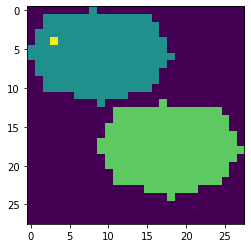

In [ ]:
import math 
from PIL import Image, ImageDraw 
from PIL import ImagePath  
side=8
x1 = [ ((math.cos(th) + 1) *9, (math.sin(th) + 1) * 6) for th in [i * (2 * math.pi) / side for i in range(side)] ]
x2 = [ ((math.cos(th) + 2) *9, (math.sin(th) + 3) *6) for th in [i * (2 * math.pi) / side for i in range(side)] ]

img = Image.new("RGB", (28,28))
img1 = ImageDraw.Draw(img)
# please play with the fill value
# writing the first polygon
img1.polygon(x1, fill =20)
# writing the second polygon
img1.polygon(x2, fill =30)
# img1.polygon([(3,4),(4,3)], fill =30)
img1.point([(3,4)] , fill=40)

img=np.array(img)
# note that the filling of the values happens at the channel 1, so we are considering only the first channel here
plt.imshow(img[:,:,0])
print(img.shape)
print(img[:,:,0]//10)
im = Image.fromarray(img[:,:,0])
im.save("test_image.png")

In [ ]:
# !rm -rf /content/data/output

In [ ]:
# after you have computed the vertexlist plot that polygone in image like this

# img = Image.new("RGB", (w, h))
# img1 = ImageDraw.Draw(img)
# img1.polygon(vertexlist[i], fill = label_clr[label[i]])

# after drawing all the polygons that we collected from json file, 
# you need to store that image in the folder like this "data/output/scene/framenumber_gtFine_polygons.png"

# after saving the image into disk, store the path in a list
# after storing all the paths, add a column to the data_df['mask'] ex: data_df['mask']= mask_paths



def compute_masks(data_df):

    mask_paths = []
    for jsonFile in tqdm(data_df["json"]):
        w, h, label, vertexlist = get_poly(jsonFile)
        img = Image.new("RGB", (w, h))
        img1 = ImageDraw.Draw(img)

        for i in range(len(label)):             
            if len(vertexlist[i]) >= 2:              # to draw polygon , we need atleast two coordinates
                img1.polygon(vertexlist[i], fill=label_clr[label[i]])
            # else:
            #     img1.point(vertexlist[i], fill=label_clr[label[i]])

        framenumber = jsonFile[14 : jsonFile.index("_")]            # example  - data/mask/201/frame0029_gtFine_polygons.json
        scene = jsonFile[10:13]
        img = np.array(img)
        im = Image.fromarray(img[:, :, 0])

        scene_path = os.path.join("data/output", f"{scene}")
        os.makedirs(scene_path, exist_ok=True)
        mask_path = os.path.join(scene_path, f"{framenumber}_gtFine_polygons.png")
        im.save(mask_path)

        mask_paths.append(mask_path)
    data_df["mask"] = mask_paths
    return data_df


In [ ]:
data_df = compute_masks(data_df)
data_df.head()

100%|██████████| 4008/4008 [04:06<00:00, 16.23it/s]


,images,json,mask
0,data/images/201/frame0029_leftImg8bit.jpg,data/mask/201/frame0029_gtFine_polygons.json,data/output/201/frame0029_gtFine_polygons.png
1,data/images/201/frame0299_leftImg8bit.jpg,data/mask/201/frame0299_gtFine_polygons.json,data/output/201/frame0299_gtFine_polygons.png
2,data/images/201/frame0779_leftImg8bit.jpg,data/mask/201/frame0779_gtFine_polygons.json,data/output/201/frame0779_gtFine_polygons.png
3,data/images/201/frame1019_leftImg8bit.jpg,data/mask/201/frame1019_gtFine_polygons.json,data/output/201/frame1019_gtFine_polygons.png
4,data/images/201/frame1469_leftImg8bit.jpg,data/mask/201/frame1469_gtFine_polygons.json,data/output/201/frame1469_gtFine_polygons.png


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/segmentation_assign_data                 
 # why % is used - https://stackoverflow.com/questions/48298146/changing-directory-in-google-colab-breaking-out-of-the-python-interpreter

/content/drive/MyDrive/segmentation_assign_data


In [ ]:
pwd

'/content/drive/MyDrive/segmentation_assign_data'

In [ ]:
import urllib.request

(1080, 1920)
(1080, 1920)
False


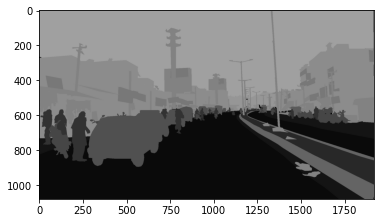

In [ ]:
def grader_3():
    url = "https://i.imgur.com/4XSUlHk.png"
    url_response = urllib.request.urlopen(url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)
    print(img.shape)

    my_img = cv2.imread('data/output/201/frame0029_gtFine_polygons.png')    
    print(my_img[:,:,0].shape)
    plt.imshow(my_img)
    # plt.imshow(my_img[:,:,0])
    print((my_img[:,:,0] == img).all())
    # data_df.to_csv('preprocessed_data.csv', index=False)
grader_3()

# Task 2: Training CANet

In [ ]:
import tensorflow as tf
# tf.compat.v1.enable_eager_execution()
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Multiply
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Add, Multiply ,  Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D , Concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
K.set_image_data_format('channels_last')

* as a part of this assignment we will be implementing the architecture based on this paper https://arxiv.org/pdf/2002.12041.pdf
* We will be using the custom layers concept that we used in seq-seq assignment
* You can devide the whole architecture can be devided into two parts
    1. Encoder
    2. Decoder
    <img src='https://i.imgur.com/prH3Mno.png' width="600">
* Encoder:
    * The first step of the encoder is to create the channel maps [$C_1$, $C_2$, $C_3$, $C_4$]
    * $C_1$ width and heigths are 4x times less than the original image
    * $C_2$ width and heigths are 8x times less than the original image
    * $C_3$ width and heigths are 8x times less than the original image
    * $C_4$ width and heigths are 8x times less than the original image
    * <i>you can reduce the dimensions by using stride parameter</i>.
    * [$C_1$, $C_2$, $C_3$, $C_4$] are formed by applying a "conv block" followed by $k$ number of "identity block". i.e the $C_k$ feature map will single "conv block" followed by $k$ number of "identity blocks".
    <table>
    <tr><td><img src="https://i.imgur.com/R8Gdypo.png" width="300"></td>
        <td><img src="https://i.imgur.com/KNunjQK.png" width="250"></td></tr>
    </table>
    * <strong>The conv block and identity block of $C_1$</strong>: the number filters in the covolutional layers will be $[4,4,8]$ and the number of filters in the parallel conv layer will also be $8$.
    * <strong>The conv block and identity block of $C_2$</strong>: the number filters in the covolutional layers will be $[8,8,16]$ and the number of filters in the parallel conv layer will also be $16$.
    * <strong>The conv block and identity block of $C_3$</strong>: the number filters in the covolutional layers will be $[16,16,32]$ and the number of filters in the parallel conv layer will also be $32$.
    * <strong>The conv block and identity block of $C_4$</strong>: the number filters in the covolutional layers will be $[32,32,64]$ and the number of filters in the parallel conv layer will also be $64$.
    * Here $\oplus$ represents the elementwise sum
    <br>
    
    <font color="red">NOTE: these filters are of your choice, you can explore more options also</font>
    
    * Example: if your image is of size $(512, 512, 3)$
        * the output after $C_1$ will be $128*128*8$
        * the output after $C_2$ will be $64*64*16$
        * the output after $C_3$ will be $64*64*32$
        * the output after $C_4$ will be $64*64*64$

In [ ]:
# https://towardsdatascience.com/im-out-of-the-layers-how-to-make-a-custom-tensorflow-2-layer-9921942c88fc 

In [ ]:
class convolutional_block(tf.keras.layers.Layer):

    def __init__(self,  kernel = 3 ,  filters=[4,4,8], stride=1, name="conv_block"):

        super().__init__(name=name)
        self.F1, self.F2, self.F3 = filters
        self.kernel = kernel
        self.stride = stride

        self.conv_layer_top = Conv2D(self.F1 ,1)
        self.BN1  = BatchNormalization()
        self.conv_layer_mid = Conv2D(self.F2 ,self.kernel , self.stride , padding = 'same')
        self.BN2  = BatchNormalization()
        self.conv_layer_bot = Conv2D(self.F3 ,1)
        self.BN3  = BatchNormalization()
        self.activation = Activation('relu')

        # parallel layer
        self.conv_layer_parallel = Conv2D(self.F3 ,self.kernel , self.stride , padding = 'same')
        self.BN_parallel = BatchNormalization()

        self.add_layer = Add()

    def call(self, X):
        # shape of X : (None, 256, 256, 64)
        X_parallel = X

        X = self.conv_layer_top(X)
        X = self.BN1(X)
        X = self.activation(X)

        X = self.conv_layer_mid(X)
        X = self.BN2(X)
        X = self.activation(X)

        X = self.conv_layer_bot(X)
        X = self.BN3(X)

        X_parallel = self.conv_layer_parallel(X_parallel)
        X_parallel = self.BN_parallel(X_parallel)
        X_parallel = self.activation(X_parallel)

        # print(X.shape , X_parallel.shape)             (None, 128, 128, 8) (None, 128, 128, 8)

        X_output = self.add_layer([X , X_parallel])
        
        return X_output

In [ ]:
class identity_block(tf.keras.layers.Layer):
    def __init__(self, kernel=3,  filters=[4,4,8], name="identity_block"):
        super().__init__(name=name)
        self.F1, self.F2, self.F3 = filters
        self.kernel = kernel

        self.conv_layer_top_11 = Conv2D(self.F1 ,1)                 # 11 -> 1*1 kernel
        self.BN1  = BatchNormalization()
        self.conv_layer_mid_33 = Conv2D(self.F2 ,self.kernel , padding = 'same')
        self.BN2  = BatchNormalization()
        self.conv_layer_bot_11 = Conv2D(self.F3 ,1)  
        self.BN3  = BatchNormalization()

        self.activation = Activation('relu')
        self.add_layer = Add()


    def call(self, X):
        X_parallel = X
        # write the architecutre that was mentioned above
        X = self.conv_layer_top_11(X)
        X = self.BN1(X)
        X  = self.activation(X)

        X = self.conv_layer_mid_33(X)
        X = self.BN2(X)
        X  = self.activation(X)

        X = self.conv_layer_bot_11(X)
        X = self.BN3(X)

        X = self.add_layer([X , X_parallel])
        X = self.activation(X)

        return X

In [ ]:
##below

##global flow 
#global avg pool : single value for each of channel  ;  (64,64,64)  -> (1,64)         ; maybe it already return (1,1,64) ; check doc 
#you need to reshape it to 3d before passing it further  - (1,1,64)
#after 1*1 conv -> (1,1,64)
#after upsample  ->  (64,64,64) ; same as input shape 

* The output of the $C_4$ will be passed to $\text{Chained Context Aggregation Module (CAM)}$
<img src='https://i.imgur.com/Bu63AAA.png' width="400">
* The CAM module will have two operations names Context flow and Global flow
* <strong>The Global flow</strong>: 
    * as shown in the above figure first we willl apply  <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D">global avg pooling</a> which results in (#, 1, 1, number_of_filters) then applying <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization?version=nightly">BN</a>, <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU">RELU</a>, $1*1 \text{ Conv}$ layer sequentially which results a matrix (#, 1, 1, number_of_filters). Finally apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> / <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose">conv2d transpose</a> to make the output same as the input dimensions (#, input_height, input_width, number_of_filters)
    * If you use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> then use bilinear pooling as interpolation technique
* <strong>The Context flow</strong>: 
    * as shown in the above figure (c) the context flow will get inputs from two modules `a. C4` `b. From the above flow` 
    * We will be <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate">concatinating</a> the both inputs on the last axis.
    * After the concatination we will be applying <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D"> Average pooling </a> which reduces the size of feature map by $N\times$ times
    * In the paper it was mentioned that to apply a group convolutions, but for the assignment we will be applying the simple conv layers with kernel size $(3*3)$
    * We are skipping the channel shuffling 
    * similarly we will be applying a simple conv layers with kernel size $(3*3)$ consider this output is X
    * later we will get the Y=(X $\otimes \sigma((1\times1)conv(relu((1\times1)conv(X))))) \oplus X$, here $\oplus$ is elementwise addition and $\otimes$ is elementwise multiplication
    * Finally apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> / <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose">conv2d transpose</a> to make the output same as the input dimensions (#, input_height, input_width, number_of_filters)
    * If you use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> then use bilinear pooling as interpolation technique

NOTE: here N times reduction and N time increments makes the input and out shape same, you can explore with the N values, you can choose N = 2 or 4

* Example with N=2:
    * Assume the C4 is of shape (64,64,64) then the shape of GF will be (64,64,32)
    * Assume the C4 is of shape (64,64,64) and the shape of GF is (64,64,32) then the shape of CF1 will be (64,64,32)
    * Assume the C4 is of shape (64,64,64) and the shape of CF1 is (64,64,32) then the shape of CF2 will be (64,64,32)
    * Assume the C4 is of shape (64,64,64) and the shape of CF2 is (64,64,32) then the shape of CF3 will be (64,64,32)

In [ ]:
#how these above shapes ?? 

In [ ]:
class global_flow(tf.keras.layers.Layer):
    def __init__(self, input_height , input_width, input_channels , name="global_flow"):
        super().__init__(name=name)
        self.global_average_pool = GlobalAveragePooling2D(data_format = 'channels_last' , keepdims = True)
        self.BN = BatchNormalization()
        self.activation  = Activation('relu')
        self.conv_11  = Conv2D(input_channels , 1)    # 1*1 conv
        self.upsample = UpSampling2D(size = (input_height , input_width)  , interpolation = 'bilinear' )

    def call(self, X):
        # implement the global flow operatiom
        X = self.global_average_pool(X)             # output shape : (batch_size, 1, 1, input_channels)
        X = self.BN(X)
        X = self.activation(X)
        X =  self.conv_11(X)
        X = self.upsample(X)
        return X

In [ ]:
X_in = tf.keras.layers.Input(shape=(256, 256, 64))
global_block=global_flow(256, 256, 64)
global_output= global_block(X_in)
print(global_output.shape)

(None, 256, 256, 64)


In [ ]:
class context_flow(tf.keras.layers.Layer):    
    def __init__(self, input_channels ,  name="context_flow"):
        super().__init__(name=name)

        self.concat = Concatenate(axis = -1) 
        self.avg_pool = AveragePooling2D(pool_size = 2 )         #  strides -> If None, it will default to pool_size.
        self.conv_33_1 = Conv2D(input_channels //2 , 3, padding = 'same' , activation ='relu')
        self.conv_33_2 = Conv2D(input_channels , 3, padding = 'same' , activation ='relu')
        self.conv_11_1  = Conv2D(input_channels //2  , 1 )
        self.conv_11_2  = Conv2D(input_channels  , 1 )
        self.upsample = UpSampling2D(size = 2 , interpolation= 'bilinear')

        self.act_relu = Activation('relu')
        self.act_sigmoid = Activation('relu')
        self.mul = Multiply()
        self.add = Add()


    def call(self, X ):
        # here X will a list of two elements 
        C4_INP, FLOW_INP = X[0], X[1] 
        # implement the context flow as mentioned in the above cell
        X_concat =  self.concat([C4_INP, FLOW_INP ])
        X_pool = self.avg_pool(X_concat)               
        X_conv1 = self.conv_33_1(X_pool)
        X_conv2 = self.conv_33_2(X_conv1)

        X_= self.conv_11_1(X_conv2)
        X_= self.act_relu(X_)
        X_= self.conv_11_2 (X_)
        X_= self.act_sigmoid(X_)

        X_ = self.mul([X_conv2,X_])
        X_ = self.add([X_conv2,X_])

        X_ = self.upsample (X_)
        return X_

In [ ]:
X_in1 = tf.keras.layers.Input(shape=(256, 256, 64))
X_in2 = tf.keras.layers.Input(shape=(256, 256, 64))
context_block=context_flow( 64)
context_output= context_block([X_in1 , X_in2])
print(context_output.shape)

(None, 256, 256, 64)


* As shown in the above architecture we will be having 4 context flows
* if you have implemented correctly all the shapes of Global Flow, and 3 context flows will have the same dimension
* the output of these 4 modules will be <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add">added</a> to get the same output matrix
<img src='https://i.imgur.com/Bu63AAA.png' width="400">
 * The output of after the sum, will be sent to the <strong>Feature selection module $FSM$</strong>
 
* Example:
    * if the shapes of GF, CF1, CF2, CF3 are (64,64,32), (64,64,32), (64,64,32), (64,64,32), (64,64,32) respectivly then after the sum we will be getting (64,64,32), which will be passed to the next module.
 
<strong>Feature selection module</strong>:

* As part of the FSM we will be applying a conv layer (3,3) with the padding="same" so that the output and input will have same shapes
* Let call the output as X
* Pass the X to global pooling which results the matrix (#, 1, 1, number_of_channels)
* Apply $1*1$ conv layer, after the pooling
* the output of the $1*1$ conv layer will be passed to the Batch normalization layer, followed by Sigmoid activation function.
* we will be having the output matrix of shape (#, 1, 1, number_of_channels) lets call it 'Y'
* <strong>we can interpret this as attention mechanisum, i.e for each channel we will having a weight</strong>
* the dimension of X (#, w, h, k) and output above steps Y is (#, 1, 1, k) i.e we need to multiply each channel of X will be <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Multiply">multiplied</a> with corresponding channel of Y
* After creating the weighted channel map we will be doing upsampling such that it will double the height and width.
* apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> with bilinear pooling as interpolation technique

* <font color="red">Example</font>:
    * Assume the matrix shape of the input is (64,64,32) then after upsampling it will be (128,128,32)

In [ ]:
class fsm(tf.keras.layers.Layer):    
    def __init__(self,input_height , input_width , channels ,  name="feature_selection"):
        super().__init__(name=name)

        self.h = input_height
        self.w = input_width

        self.conv_33 = Conv2D(channels , 3 , padding='same'  , activation = 'relu')
        self.global_pool = GlobalAveragePooling2D(keepdims = True)
        self.conv_11 = Conv2D(channels , 1)
        self.BN= BatchNormalization()
        self.act_sigmoid = Activation('sigmoid')
        self.upsample = UpSampling2D(size =2 , interpolation ='bilinear')


        
    def call(self, X):
        # implement the FSM modules based on image in the above cells
        X_conv = self.conv_33(X)

        X = self.global_pool(X_conv)
        X = self.conv_11(X)
        X = self.BN(X)
        X = self.act_sigmoid(X)                # shape  (#, 1, 1, k)

        X = tf.repeat(X , repeats = self.w , axis = 1)      #shape : (#, w, 1, k)         #https://www.tensorflow.org/api_docs/python/tf/repeat    
        X = tf.repeat(X , repeats = self.h  , axis = 2)        ##shape : (#, w, h, k)   


        FSM_Conv_weighted  = Multiply()([X_conv , X])
        FSM_Conv_final = self.upsample(FSM_Conv_weighted)

        return FSM_Conv_final

In [ ]:
X_in = tf.keras.layers.Input(shape=(64,64,32))
fsm_block=fsm(64,64,32)
fsm_output= fsm_block(X_in)
print(fsm_output.shape)

(None, 128, 128, 32)


In [ ]:
import numpy as np
x1 = tf.keras.layers.Dense(8)(np.arange(10).reshape(1,1, 10))
print(x1.shape)
x1 = tf.repeat(x1, repeats=5 , axis = 0)
x1 = tf.repeat(x1, repeats=5 , axis = 1)
print(x1.shape)

x2 = tf.keras.layers.Dense(8)(np.arange(10, 260).reshape(5,5, 10))
multiplied = tf.keras.layers.Multiply()([x1, x2])
multiplied.shape


(1, 1, 8)
(5, 5, 8)


TensorShape([5, 5, 8])

In [ ]:
x1[:,:,2]

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-2.0341854, -2.0341854, -2.0341854, -2.0341854, -2.0341854],
       [-2.0341854, -2.0341854, -2.0341854, -2.0341854, -2.0341854],
       [-2.0341854, -2.0341854, -2.0341854, -2.0341854, -2.0341854],
       [-2.0341854, -2.0341854, -2.0341854, -2.0341854, -2.0341854],
       [-2.0341854, -2.0341854, -2.0341854, -2.0341854, -2.0341854]],
      dtype=float32)>

* <b>Adapted Global Convolutional Network (AGCN)</b>:
    <img src="https://i.imgur.com/QNB8RmV.png" width="300">
    
    * AGCN will get the input from the output of the "conv block" of $C_1$
    
    * In all the above layers we will be using the padding="same" and stride=(1,1)
    
    * so that we can have the input and output matrices of same size
    
* <font color="red">Example</font>:
    * Assume the matrix shape of the input is (128,128,32) then the output it will be (128,128,32)

In [ ]:
class agcn(tf.keras.layers.Layer):    
    def __init__(self, channels , name="global_conv_net"):
        super().__init__(name=name)

        self.conv_71_left = Conv2D(channels , (7,1) , padding ='same' , activation = 'relu')
        self.conv_17_left = Conv2D(channels , (1,7) , padding ='same' , activation = 'relu')

        self.conv_17_right = Conv2D(channels , (1,7) , padding ='same' , activation = 'relu')
        self.conv_71_right = Conv2D(channels , (7,1) , padding ='same' , activation = 'relu')

        self.conv_33 = Conv2D(channels , 3 , padding='same' , activation = 'relu')

        
    def call(self, X):
        # please implement the above mentioned architecture
        X_left = self.conv_71_left(X)
        X_left = self.conv_17_left(X_left)        
        
        X_right = self.conv_17_right(X)
        X_right = self.conv_71_right(X_right)

        X_add = Add()([X_left , X_right])
        X_conv = self.conv_33(X_add)

        X = Add()([X_add , X_conv])
        return X

In [ ]:
X_in = tf.keras.layers.Input(shape=(128,128,32))
agcn_block=agcn(32)
agcn_output= agcn_block(X_in)
print(agcn_output.shape)

(None, 128, 128, 32)


*     <img src='https://i.imgur.com/prH3Mno.png' width="600">
* as shown in the architecture, after we get the AGCN it will get concatinated with the FSM output

* If we observe the shapes both AGCN and FSM will have same height and weight

* we will be concatinating both these outputs over the last axis

* The concatinated output will be passed to a conv layers with filters = number of classes in our data set and the activation function = 'relu'

* we will be using padding="same" which results in the same size feature map

* If you observe the shape of matrix, it will be 4x times less than the original image

* to make it equal to the original output shape, we will do 4x times upsampling of rows and columns

* apply <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D">upsampling</a> with bilinear pooling as interpolation technique

* Finally we will be applying sigmoid activation.

* Example:
    * Assume the matrix shape of AGCN is (128,128,32)  and FSM is (128,128,32) the concatination will make it (128, 128, 64)
    * Applying conv layer will make it (128,128,21)
    * Finally applying upsampling will make it (512, 512, 21)
    * Applying sigmoid will result in the same matrix (512, 512, 21)

In [ ]:
X_input = Input(shape=(512,512,3))

# Stage 1
X = Conv2D(64, (3, 3), name='conv1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X_input)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)
print(X.shape)

(None, 256, 256, 64)


* If you observe the arcitecture we are creating a feature map with 2x time less width and height
* we have written the first stage of the code above.
* Write the next layers by using the custom layers we have written

In [ ]:
C1 = convolutional_block(kernel = 3  ,filters = [4,4,8] , stride = 2 , name = 'conv_block1')(X)
C1 = identity_block(kernel = 3  ,filters = [4,4,8] , name = 'identity_block_1_1')(C1)

C2 = convolutional_block(kernel=3 , filters = [8,8,16] , stride = 2 ,name = 'conv_blocK2' )(C1)
C2 = identity_block(kernel=3 , filters = [8,8,16] ,name = 'identity_block_2_1' )(C2)
C2 = identity_block(kernel=3 , filters = [8,8,16] ,name = 'identity_block_2_2' )(C2)

C3 = convolutional_block(kernel=3 , filters = [16,16,32] , stride = 1 ,name = 'conv_blocK3' )(C2)
C3 = identity_block(kernel=3 , filters = [16,16,32] ,name = 'identity_block_3_1' )(C3)
C3 = identity_block(kernel=3 , filters = [16,16,32] ,name = 'identity_block_3_2' )(C3)  
C3 = identity_block(kernel=3 , filters = [16,16,32] ,name = 'identity_block_3_3' )(C3)

C4 = convolutional_block(kernel=3 , filters = [32,32,64] , stride = 1 ,name = 'conv_blocK4' )(C3)
C4 = identity_block(kernel=3 , filters = [32,32,64] ,name = 'identity_block_4_1' )(C4)
C4 = identity_block(kernel=3 , filters = [32,32,64] ,name = 'identity_block_4_2' )(C4)  
C4 = identity_block(kernel=3 , filters = [32,32,64] ,name = 'identity_block_4_3' )(C4)
C4 = identity_block(kernel=3 , filters = [32,32,64] ,name = 'identity_block_4_4' )(C4)

# print(C4.shape)                  # (None, 64, 64, 64)
height , width , channels = C4.shape[1] , C4.shape[2] , C4.shape[3]

#Global flow
GF= global_flow(input_height= height , input_width = width , input_channels= channels)(C4)                    # shape : [None, 64, 64, 64]

#context flow 
CF1 = context_flow(input_channels = C4.shape[-1] , name="context_flow1")([C4 , GF])                  # shape  :(None, 64, 64, 64)
CF2 = context_flow(input_channels = C4.shape[-1] , name="context_flow2")([C4 , CF1])                # shape  :(None, 64, 64, 64)
CF3 = context_flow(input_channels = C4.shape[-1] , name="context_flow3")([C4 , CF2])                # shape  :(None, 64, 64, 64)



sum_flows = Add()([GF,CF1,CF2,CF3])                    #shape : (None, 64, 64, 64)

height , width , channels = sum_flows.shape[1] , sum_flows.shape[2] , sum_flows.shape[3]
FSM = fsm(input_height= height , input_width = width  , channels= channels)(sum_flows)                                     #shape  : (None, 128, 128, 64)

#shape of C1 -> (None, 128, 128, 8)
channels = C1.shape[-1]
AGCN = agcn(channels = channels)(C1)                   # shape AGCN : (None, 128, 128, 8)

concat = Concatenate(axis=-1)([AGCN , FSM])                     #(None, 128, 128, 72)
conv = Conv2D(21 , 3 , padding='same')(concat)                                   #(None, 128, 128, 21)
final = UpSampling2D(size = 4 , interpolation ='bilinear')(conv)                 #(None, 512, 512, 21)
final_output = Activation('sigmoid')(final)                                      #(None, 512, 512, 21)
 

In [ ]:
# write the complete architecutre

model = Model(inputs = X_input, outputs = final_output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 512, 512, 64  1792        ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 512, 512, 64  256         ['conv1[0][0]']                  
                                )                                                             

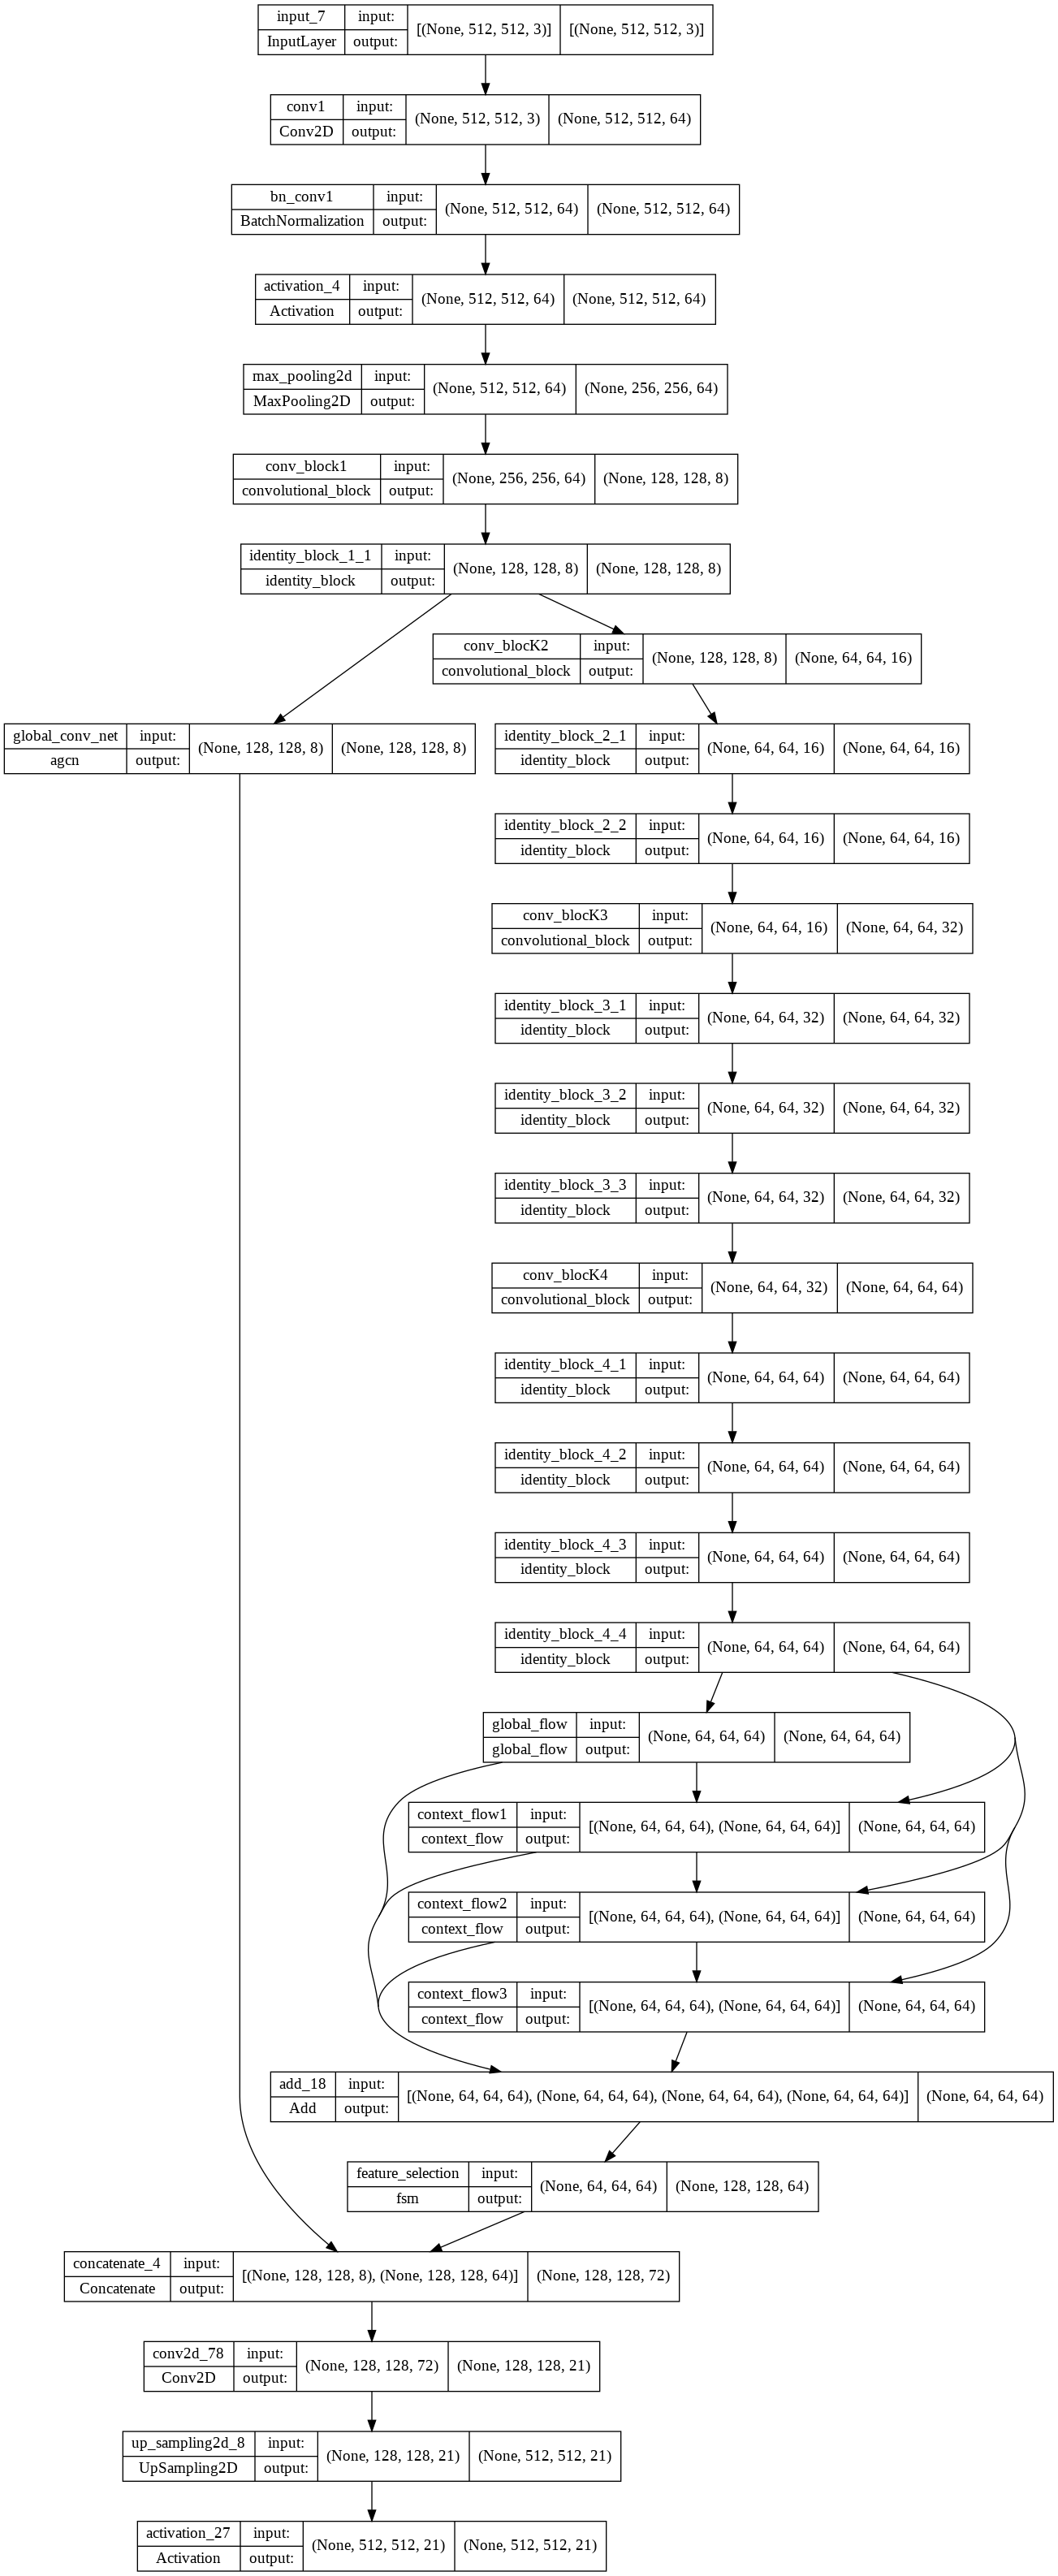

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB')

In [ ]:
import imgaug.augmenters as iaa
aug1 = iaa.Fliplr(1)
aug2 = iaa.Flipud(1)
aug3 = iaa.Emboss(alpha=(1), strength=1)
aug4 = iaa.DirectedEdgeDetect(alpha=(0.8), direction=(1.0))


class Dataset:
    CLASSES = list(range(0,201,10))
    
    def __init__(self, images_dir, file_paths_images , file_paths_masks , augment):
        
        self.paths_images = file_paths_images
        self.paths_masks = file_paths_masks
        # the paths of images
        self.images_fps   = [os.path.join(images_dir, image_id) for image_id in self.paths_images]
        # the paths of segmentation images
        self.masks_fps    = [os.path.join(images_dir, image_id) for image_id in self.paths_masks]
        
        #augmentation will be done only on train images
        self.augment  = augment 
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i], cv2.IMREAD_UNCHANGED) 
        image = cv2.resize(image,(512 , 512),interpolation=cv2.INTER_NEAREST)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        image_mask = cv2.imread(self.masks_fps[i], cv2.IMREAD_UNCHANGED) 
        image_mask = cv2.resize(image_mask,(512 , 512),interpolation=cv2.INTER_NEAREST)
        # image_mask = cv2.cvtColor(image_mask, cv2.COLOR_BGR2RGB)         # using this on image_mask , will create 3 channels 

        
        image_masks = [(image_mask == v) for v in self.CLASSES]              #extracting class info for all classes 
        image_mask = np.stack(image_masks, axis=-1).astype('float')        # image_mask  -> (image_height , image_width , #classes) 

        if(self.augment):
            a = np.random.uniform()
            if a<0.25:
                image = aug1.augment_image(image)
                image_mask = aug1.augment_image(image_mask)
            elif a<0.50:
                image = aug2.augment_image(image)
                image_mask = aug2.augment_image(image_mask)
            elif a<0.75:
                image = aug3.augment_image(image)
                image_mask = aug3.augment_image(image_mask)
            else:
                image = aug4.augment_image(image)
                image_mask = aug4.augment_image(image_mask)
            
        return image, image_mask
        
    def __len__(self):
        return len(self.paths_images)                   #length of dataset 
    
    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

    def __getitem__(self, i):

        #dividing dataset into batches 
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])                # dataset[j] will return 2 things , image and image_mask 
        
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]                         
        
        return tuple(batch)
    
    def __len__(self):
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

In [ ]:
from segmentation_models.metrics import iou_score

# optim = tf.keras.optimizers.Adam(0.0001)
optim = tf.keras.optimizers.Adam(0.001)

focal_loss = sm.losses.cce_dice_loss

model.compile(optim, focal_loss, metrics=[iou_score])


In [ ]:
# Dataset for train images
# dir_path = '/content/drive/MyDrive/segmentation_assign_data'
dir_path = '/content'


train_dataset = Dataset(dir_path,X_train_images,X_train_masks , augment = True)
test_dataset  = Dataset(dir_path,X_test_images,X_test_masks , augment = False)

BATCH_SIZE=6
train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = Dataloder(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

      

callbacks = [
    tf.keras.callbacks.ModelCheckpoint('./best_model.h5', save_weights_only=True, save_best_only=True, \
                                       mode='max', monitor='val_iou_score'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_iou_score', min_lr=0.000001,patience=2 , mode = 'max'),              # new_lr = lr * factor ; default factor = 0.1
    tf.keras.callbacks.EarlyStopping(
    monitor='val_iou_score',
    patience=3,
    mode='max',
    restore_best_weights=True
)
]


In [ ]:
print(train_dataloader[0][0].shape)
print(train_dataloader[0][1].shape)

(16, 512, 512, 3)
(16, 512, 512, 21)


In [ ]:
print(train_dataloader[0][0].shape)
print(train_dataloader[0][1].shape)

(16, 512, 512, 3)
(16, 512, 512, 21)


In [ ]:
print(train_dataloader[1][0].shape)
print(train_dataloader[1][1].shape)

(16, 512, 512, 3)
(16, 512, 512, 21)


In [ ]:
history = model.fit(train_dataloader, steps_per_epoch=len(train_dataloader), epochs=10,\
                              validation_data=test_dataloader,callbacks=callbacks, )

Epoch 1/10
534/534 [==============================] - 575s 1s/step - loss: 0.6096 - iou_score: 0.3686 - val_loss: 0.6005 - val_iou_score: 0.3879 - lr: 0.0010
Epoch 2/10
534/534 [==============================] - 552s 1s/step - loss: 0.5845 - iou_score: 0.3868 - val_loss: 0.6182 - val_iou_score: 0.3826 - lr: 0.0010
Epoch 3/10
534/534 [==============================] - 548s 1s/step - loss: 0.5729 - iou_score: 0.3947 - val_loss: 0.7832 - val_iou_score: 0.3107 - lr: 0.0010
Epoch 4/10
534/534 [==============================] - 555s 1s/step - loss: 0.5461 - iou_score: 0.4125 - val_loss: 0.5258 - val_iou_score: 0.4372 - lr: 1.0000e-04
Epoch 5/10
534/534 [==============================] - 552s 1s/step - loss: 0.5360 - iou_score: 0.4203 - val_loss: 0.5172 - val_iou_score: 0.4429 - lr: 1.0000e-04
Epoch 6/10
534/534 [==============================] - 549s 1s/step - loss: 0.5292 - iou_score: 0.4257 - val_loss: 0.5148 - val_iou_score: 0.4457 - lr: 1.0000e-04
Epoch 7/10
534/534 [====================

In [ ]:
model.evaluate(test_dataloader)

133/133 [==============================] - 62s 463ms/step - loss: 0.5051 - iou_score: 0.4533


[0.5050947666168213, 0.45330339670181274]

In [ ]:
history.history

{'iou_score': [0.3686111569404602,
  0.38683006167411804,
  0.3947376608848572,
  0.41247063875198364,
  0.42029643058776855,
  0.42570552229881287,
  0.42696961760520935,
  0.42981937527656555,
  0.4311716854572296,
  0.4328811466693878],
 'loss': [0.6096484065055847,
  0.58445805311203,
  0.5728710889816284,
  0.546053946018219,
  0.5359663367271423,
  0.5291979908943176,
  0.5269302129745483,
  0.5240838527679443,
  0.5216735601425171,
  0.519644558429718],
 'lr': [0.001,
  0.001,
  0.001,
  0.000100000005,
  0.000100000005,
  0.000100000005,
  0.000100000005,
  0.000100000005,
  0.000100000005,
  0.000100000005],
 'val_iou_score': [0.3878667652606964,
  0.3826413154602051,
  0.31067633628845215,
  0.43720611929893494,
  0.4429105818271637,
  0.4457242786884308,
  0.4451989531517029,
  0.4467592239379883,
  0.45009586215019226,
  0.45330339670181274],
 'val_loss': [0.6004934906959534,
  0.6182164549827576,
  0.783245861530304,
  0.5258226990699768,
  0.5172484517097473,
  0.51478242

In [ ]:
model.load_weights('/content/best_model.h5')

In [ ]:
model.evaluate(test_dataloader)

133/133 [==============================] - 76s 487ms/step - loss: 0.5051 - iou_score: 0.4533


[0.5050947666168213, 0.45330339670181274]

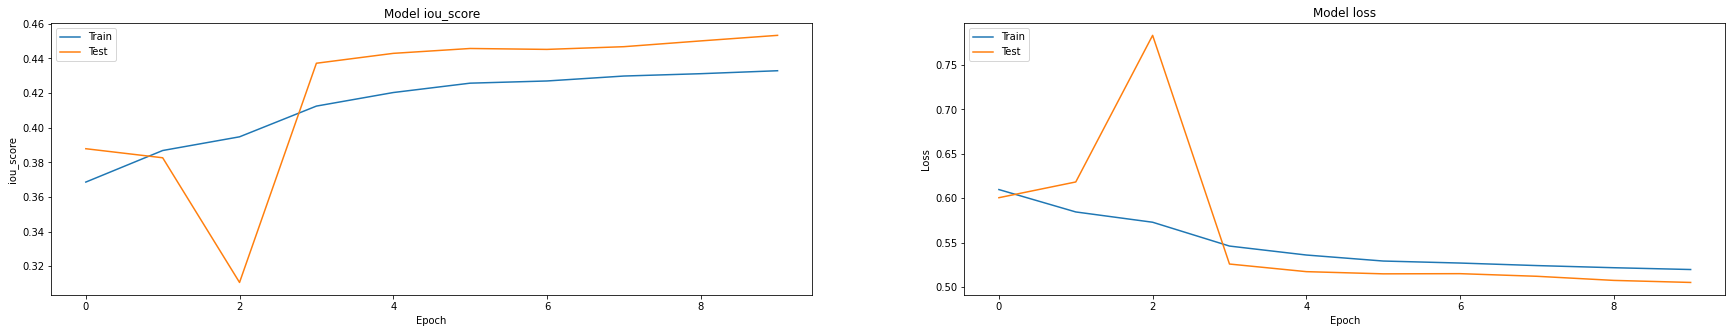

In [ ]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
image = cv2.imread(X_test_images[0], cv2.IMREAD_UNCHANGED)
image = cv2.resize(image, (512,512) , interpolation=cv2.INTER_AREA)
pred_image= model.predict(image[np.newaxis,:,:,:])
pred_image.shape

(1, 512, 512, 21)

In [ ]:
pred_image[0]

array([[[3.2450326e-04, 2.1466010e-03, 3.4259488e-03, ...,
         1.8849743e-24, 4.3817271e-24, 2.2673036e-24],
        [3.2450326e-04, 2.1466010e-03, 3.4259488e-03, ...,
         1.8849743e-24, 4.3817271e-24, 2.2673036e-24],
        [2.6497830e-04, 1.6604712e-03, 2.5215081e-03, ...,
         1.1508071e-25, 3.7697543e-25, 1.7744539e-25],
        ...,
        [2.0625526e-05, 8.0937725e-03, 2.6050082e-03, ...,
         6.5881642e-34, 1.5338640e-33, 1.9923088e-35],
        [6.1114071e-05, 9.7567625e-03, 3.3349791e-03, ...,
         4.2533185e-32, 9.8765188e-32, 1.4447296e-33],
        [6.1114071e-05, 9.7567625e-03, 3.3349791e-03, ...,
         4.2533185e-32, 9.8765188e-32, 1.4447296e-33]],

       [[3.2450326e-04, 2.1466010e-03, 3.4259488e-03, ...,
         1.8849743e-24, 4.3817271e-24, 2.2673036e-24],
        [3.2450326e-04, 2.1466010e-03, 3.4259488e-03, ...,
         1.8849743e-24, 4.3817271e-24, 2.2673036e-24],
        [2.6497830e-04, 1.6604712e-03, 2.5215081e-03, ...,
         1.150

In [ ]:
pred_image = pred_image[0]
pred_image = np.where(pred_image <= 0.5 , 0 , 1)
for i in range(21):
    pred_image[:,:,i] = pred_image[:,:,i] * i * 10

In [ ]:
np.sum(pred_image , axis = 2).shape


(512, 512)

In [ ]:
image_mask = cv2.imread(X_test_masks[0], cv2.IMREAD_UNCHANGED)
image_mask = cv2.resize(image_mask, (512,512), interpolation=cv2.INTER_NEAREST)
image_mask.shape

(512, 512)

In [ ]:
np.arange(0,210,10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200])

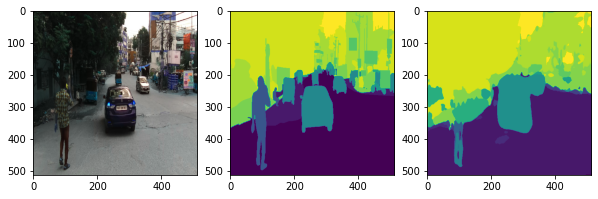

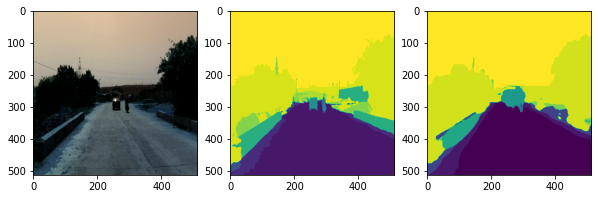

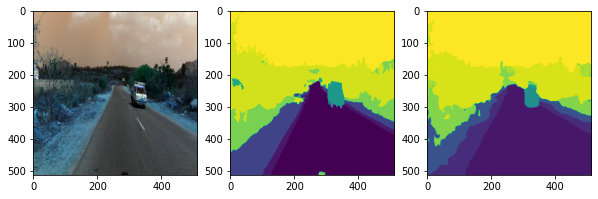

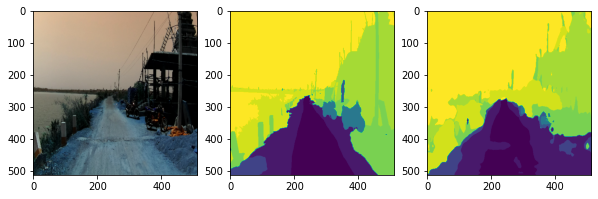

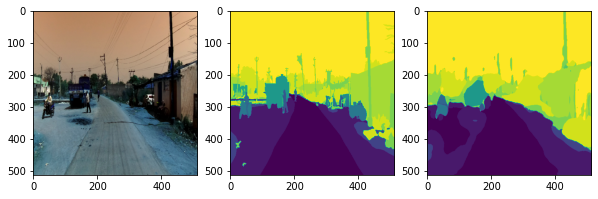

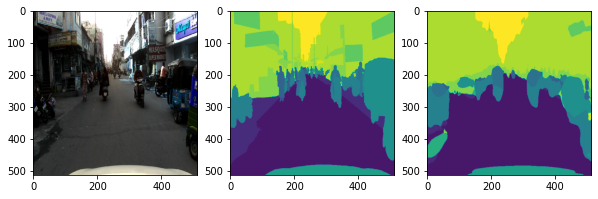

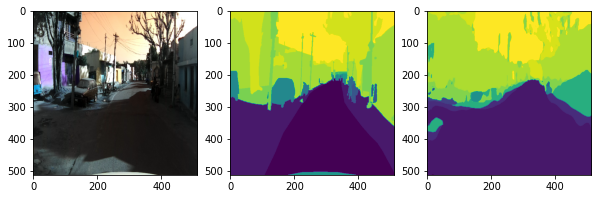

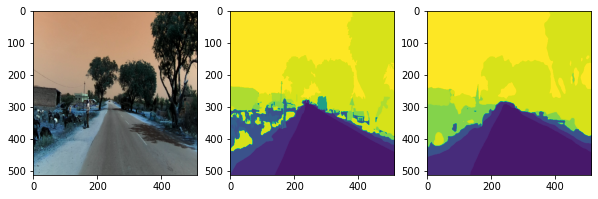

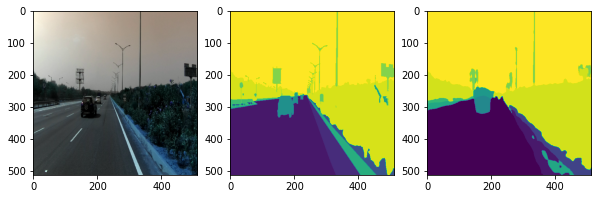

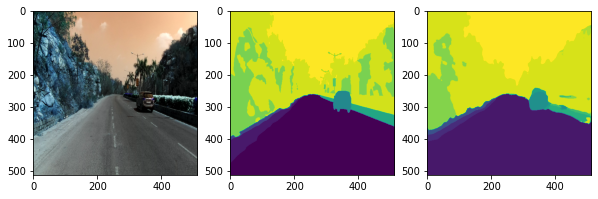

In [ ]:
dir_path = '/content'
X_test_images_10 = X_test_images[15:25]
X_test_masks_10 = X_test_masks[15:25]
for image , mask in zip(X_test_images_10 , X_test_masks_10):
    #original image
    image = cv2.imread(os.path.join(dir_path, image), cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (512,512) , interpolation=cv2.INTER_NEAREST) 
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #predicted segmentation map
    predicted  = model.predict(image[np.newaxis,:,:,:])              # shape of image[np.newaxis,:,:,:] - (1, 512, 512, 3)
    # predicted shape - (1, 512, 512, 21)
    predicted = predicted[0]

    #predicted will have values bw 0 and 1 
    # for each array predicted[i,j,:] , for diff values of i and j -> this array contais 21 values corresponding to 21 classes . We will make largest value 1 and rest 0  

    for i in range(512):
      for j in range(512):
        index_max = np.where(predicted[i,j,:] == np.max(predicted[i,j,:]))[0][0]         # np.where might return  more than 1 value  ; we make 1st occurrence of max value 1 and rest 0 

        pred_array = np.zeros(21)
        pred_array[index_max] = 1

        predicted[i,j,:] = pred_array

        
    for i in range(21):
        predicted[:,:,i] = predicted[:,:,i] * i * 10

    # adding all channels
    predicted_mask = np.sum(predicted , axis = 2)          #shape - (512, 512)

    
    #original segmentation map
    image_mask = cv2.imread(os.path.join(dir_path, mask), cv2.IMREAD_UNCHANGED)
    image_mask = cv2.resize(image_mask, (512,512), interpolation=cv2.INTER_NEAREST)             #shape - (512, 512)
    
    plt.figure(figsize=(10,6))
    plt.subplot(131)
    plt.imshow(image)
    plt.subplot(132)
    plt.imshow(image_mask)
    plt.subplot(133)
    plt.imshow(predicted_mask)
    plt.show()


